In [7]:
#12.1
#使用线性回归解决
import numpy as np
from sklearn.linear_model import LinearRegression
a = np.array([
    [4,3424,450.5],
    [5,4086,613.9],
    [4,4388,501.5],
    [7,4808,781.5],
    [5,5896,611.1],
    [10,6604,1222.1],
    [7,6662,793.2],
    [6,7018,792.7],
    [9,8706,1121],
    [8,10478,1094.2]])
model = LinearRegression().fit(a[:,:2],a[:,2])
y = model.predict(np.array([10,9600]).reshape(1,-1))
b0 = model.intercept_ #常数系数
b12 = model.coef_#k系数
R2 = model.score(a[:,:2],a[:,2])#计算R2
print('b0 = %.4f\nb12=%.4f%10.4f'%(b0,b12[0],b12[1]))
print('拟合优度R2=%.4f'%R2)

b0 = -67.3538
b12=106.9354    0.0275
拟合优度R2=0.9836


In [8]:
#12.1

import numpy as np
from sklearn.linear_model import LinearRegression
a = np.array([
    [23.56,76200,59190],
    [24.44,91200,65450],
    [32.07,106700,62360],
    [32.46,111600,64700],
    [31.15,119000,67400],
    [34.14,129200,64440],
    [35.30,143400,68000],
    [38.7,159600,72400],
    [39.63,180000,75710],
    [46.68,193000,70680]])
model = LinearRegression().fit(a[:,:2],a[:,2])
y = model.predict(np.array([10,9600]).reshape(1,-1))
b0 = model.intercept_ #常数系数
b12 = model.coef_#k系数
R2 = model.score(a[:,:2],a[:,2])#计算R2
print('b0 = %.4f\nb12=%.4f%10.4f'%(b0,b12[0],b12[1]))
print('拟合优度R2=%.4f'%R2)


b0 = 62650.9285
b12=-979.0570    0.2862
拟合优度R2=0.9022


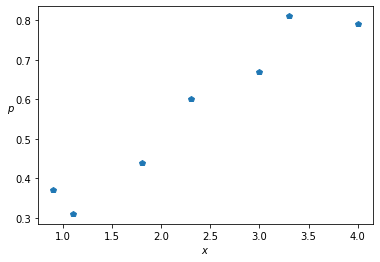

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     65.60
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           0.000465
Time:                        23:27:31   Log-Likelihood:                 11.119
No. Observations:                   7   AIC:                            -18.24
Df Residuals:                       5   BIC:                            -18.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1781      0.053      3.349      0.0

C:\Users\goodboy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [1]:
#12.3

import numpy as np
import statsmodels.api as sm
import pylab as plt
a = np.array([[0.9,0.37],[1.1,0.31],[1.8,0.44],[2.3,0.60],[3.0,0.67],[3.3,0.81],[4.0,0.79]])
x = a[:,0]; p = a[:,1]
plt.plot(x, p, 'p');
plt.xlabel('$x$')
plt.ylabel('$p$', rotation=0);
plt.show()
X = sm.add_constant(x)
md = sm.OLS(p, X).fit()  #构建并拟合模型
print(md.summary())   #输出计算结果
y = np.log(p/(1-p))
cs = np.linalg.pinv(X) @ y  #线性最小二乘拟合
x0 = -cs[0] / cs[1]   #求剂量
print(cs,'\n','剂量为：',x0)


In [13]:
#12.4

import numpy as np
a = np.loadtxt('ti10_7.txt')      #提取10×8矩阵
d = np.vstack([a[:,:4], a[:,4:]]) #变形为20×4矩阵
f = d[:,3] * (d[:,2]==1) +(100-d[:,3])*(d[:,2]==0) #发芽频数
pd = f/100  #发芽频率
mat = np.stack([np.ones(20), d[:,0],d[:,1], d[:,0]*d[:,1]]).T
cs = np.linalg.pinv(mat) @ np.log(pd/(1-pd))  #拟合参数
print('拟合的参数为：', cs)
x11 = -(cs[0]+cs[2]) / (cs[1]+cs[3])  #计算水分含量
x10 = -cs[0] / cs[1]                  #计算水分含量
print('两种水分含量分别为：', x11,',',x10)
odd1 = np.exp(cs@[1,6,1,6]) #计算加盖时发芽的赔率
odd2 = np.exp(cs@[1,6,0,0])  #计算不加盖时发芽的赔率
OR = odd1/odd2              #计算赔率比
print('加盖和不加盖的赔率分别为：',odd1,',',odd2)
print('赔率比为：', OR)



拟合的参数为： [-1.09906293  0.28603066  1.78234146 -0.3619957 ]
两种水分含量分别为： 8.994643947595016 , 3.842465455803507
加盖和不加盖的赔率分别为： 1.255442704370899 , 1.853583938291554
赔率比为： 0.6773055584027337
